# Project Proposal


## Title: Grand Slam Off the Court

Grup Number: 20

Group Members: Manushree Singhania, Bryan Chang, Shubham Sharma, Yoson Hsu

Data Set: Player Stats for Top 500 Players


In [5]:
library(tidyverse)
library(repr)
library(lubridate)
library(dplyr)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')


library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:ti

## Introduction

With the commercialization of modern sports, it would be of interest to know how much our beloved athletes are profiting from their careers. We know that players with the highest ATP (governing body for male tennis) rankings are winners on the court, yet we cannot confirm that such wins translate off the court financially. As such, our project aims to build a regression model which can answer the following question: Given a player’s metrics, can we predict a player’s career earnings at some given point in their career, and subsequently whether or not they are currently amongst the world’s 30 richest male tennis stars. The data set we are using has been published by the ATP with data on the world’s top 500 ranked active male tennis players (2021).

## Preliminary exploratory data analysis

We read the data into R using the URL provided directly from the list of given data sets. We cleaned our data by primarily separating columns and turning characters into numericals. There were columns where the value of interest was accompanied by a date; we completely got rid of said dates. The values of certain columns were characters due to the presence of special characters and additional information. All values containing NA were filtered out since blank data could skew our model. In addition, we added a column as to whether a player was currently in the top 30 for highest career earnings amongst active male players. Training data was summarized in a table, with accompanying tables showing the proportions of predictor variables. We then constructed scatter plots demonstrating the relationship between seasons active and career earnings, and one between best career ATP rank and career earnings, both color-coded by whether or not a player was one of the top 30 richest male players.

In [6]:

#read the data through the given url
player_stats_raw <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")


#select the required columns of the data, convert the the characters into doubles and integers for best rank, prize money, age
# renamed the columns to give them meaningful names, filtered the rows where values were unavailable i.e. NA. Covereted the 
# coolumns for Backhand, Handedness as factors. Added a new column to demonstrate whether the carrer earnings of a player 
# is within the top 30 career earnings of the player all over the world.

player_stats_refined <- player_stats_raw %>%
                        select(Age, Plays, 'Best Rank', Name, Backhand, 'Prize Money', Height, Seasons) %>%
                        separate(col = 'Best Rank', into = c('Best Rank', 'Date of Best Rank'), sep = " ", convert = TRUE) %>%
                        rename(Best_Rank = 'Best Rank', Date_of_Best_Rank = 'Date of Best Rank', Prize_Money = 'Prize Money') %>%
                        select(-Date_of_Best_Rank) %>%
                        filter(Height != "NA") %>%
                        separate(col = Age, into = c('Age', 'DOB'), sep = " ", convert = TRUE) %>%
                        separate(col = Prize_Money, into = c('Prize_Money', 'PMO'), sep = " ", convert = TRUE) %>%
                        select(-DOB) %>%
                        rename(Handedness = 'Plays')


player_stats_refined$Prize<-gsub("[^0-9]","",player_stats_refined$Prize_Money)
player_stats_refined <- player_stats_refined %>%
                        select(-PMO,-Prize_Money)%>%
                        mutate(Prize=as.numeric(Prize))%>%
                        filter(Prize != "NA")%>%
                        arrange(by= desc(Prize))



thirty_prize_money <- player_stats_refined$Prize[30] 


player_stats_mutated <- player_stats_refined %>%
                        mutate(is_within_thirty= if_else((thirty_prize_money< Prize) , "Yes", "No")) %>%
                        mutate(is_within_thirty=as_factor(is_within_thirty))%>%
                        mutate(Backhand=as_factor(Backhand))%>%
                        mutate(Handedness=as_factor(Handedness))

player_stats_mutated$Height<-gsub("[^0-9]","",player_stats_mutated$Height)

player_stats_mutated <- player_stats_mutated %>%
                        mutate(Height=as.numeric(Height))%>%
                        rename(Seasons_active=Seasons, Career_earnings=Prize)

player_stats_mutated

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.

Warning message:
“Expected 2 pieces. Additional pieces discarded in 20 rows [3, 26, 32, 36, 48, 49, 61, 62, 73, 79, 80, 85, 91, 100, 104, 106, 107, 112, 113, 115].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 91 rows [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, ...].”


Age,Handedness,Best_Rank,Name,Backhand,Height,Seasons_active,Career_earnings,is_within_thirty
<int>,<fct>,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
33,Left-handed,1,Rafael Nadal,Two-handed,185,19,119601561,Yes
31,Right-handed,3,Juan Martin Del Potro,Two-handed,198,14,25889586,Yes
26,Right-handed,4,Dominic Thiem,One-handed,185,10,22132368,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,Right-handed,183,Laurynas Grigelis,Two-handed,183,8,327684,No
28,Right-handed,286,Sandro Ehrat,Two-handed,180,3,95194,No
32,Right-handed,28,Santiago Giraldo,Two-handed,188,14,4416,No


In [7]:
# Dividing the data into training and testing set with 75% data in training set and 25% in testing set.

options(repr.plot.height = 5, repr.plot.width = 6)

player_split <- initial_split(player_stats_mutated, prop = 0.75, strata = is_within_thirty)  
player_train <- training(player_split)   
player_test <- testing(player_split)


player_test

Age,Handedness,Best_Rank,Name,Backhand,Height,Seasons_active,Career_earnings,is_within_thirty
<int>,<fct>,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
29,Right-handed,7,David Goffin,Two-handed,163,10,13578010,Yes
36,Right-handed,16,Philipp Kohlschreiber,One-handed,178,18,12807597,Yes
31,Right-handed,9,Roberto Bautista Agut,Two-handed,183,11,12067808,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
31,Right-handed,60,Tatsuma Ito,Two-handed,180,12,1240151,No
29,Left-handed,71,Cedrik Marcel Stebe,Two-handed,183,7,1174974,No
30,Right-handed,169,Brydan Klein,Two-handed,183,5,674687,No


In [8]:
num_obs <- nrow(player_train)

#summarized the data in the training set by grouping them based on seasons, and summarized the rest of the columns by 
# calculating the mean of Career_earnings, Height, Best_Rank, Age and percentage of Handedness, Backhand, is_within_thirty
# for each season and arranged them by seasons.
player_summarized <- player_train %>%
                        group_by(Seasons_active)%>%
                            summarize(Handedness_percentage=n() / num_obs * 100,Backhand_percentage=n() / num_obs * 100,
                              Age=mean(Age),Best_Rank=mean(Best_Rank),
                              is_within_thirty_percentage= n() / num_obs * 100,Career_earnings=mean(Career_earnings),
                                      Height=mean(Height))%>%
                            arrange(by=Seasons_active)

#Count the number of players for each type of handedness i.e. Left-handed and Right-Handed
player_Handedness <- player_train %>%
                        group_by(Handedness)%>%
                        summarize(
                                count = n(),
                        percentage = n() / num_obs * 100)

#Count the number of players for each type of Backhand i.e. Two-handed and One-handed
player_Backhand <- player_train %>%
                        group_by(Backhand)%>%
                        summarize(
                                count = n(),
                        percentage = n() / num_obs * 100)

#Count the number of players with carer earnings within the top 30 career earnings of players all over the world
player_within_thirty <- player_train %>%
                        group_by(is_within_thirty)%>%
                        summarize(
                                count = n(),
                        percentage = n() / num_obs * 100)

player_summarized
player_Handedness
player_Backhand
player_within_thirty

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



Seasons_active,Handedness_percentage,Backhand_percentage,Age,Best_Rank,is_within_thirty_percentage,Career_earnings,Height
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2.631579,2.631579,27.50,235.50,2.631579,237172,182.5
5,1.315789,1.315789,25.00,80.00,1.315789,827193,183.0
7,5.263158,5.263158,28.25,63.75,5.263158,2607878,184.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,2.631579,2.631579,34.5,4.0,2.631579,68477686,186.5
20,2.631579,2.631579,39.0,25.5,2.631579,10053822,199.0
21,1.315789,1.315789,37.0,5.0,1.315789,13376235,180.0


Handedness,count,percentage
<fct>,<int>,<dbl>
Left-handed,10,13.15789
Right-handed,66,86.84211


Backhand,count,percentage
<fct>,<int>,<dbl>
Two-handed,62,81.57895
One-handed,14,18.42105


is_within_thirty,count,percentage
<fct>,<int>,<dbl>
Yes,22,28.94737
No,54,71.05263


## Methods

All the graphs and plots described above are raw; our analysis builds off of them. For our linear regression model, we want to conduct it using a multivariable regression model to predict career earnings based on seasons active and best rank. We will further incorporate handedness, backhand, height and age as predictors. Visually, the data will be represented using scatter plots. From the current graph below, we can infer that the relationship between seasons active and career earnings is positive and linear. On the contrary, the relationship between best rank and career earnings is negative and linear. After further analysis of the data, it would be interesting to observe how other predictors affect these observations.


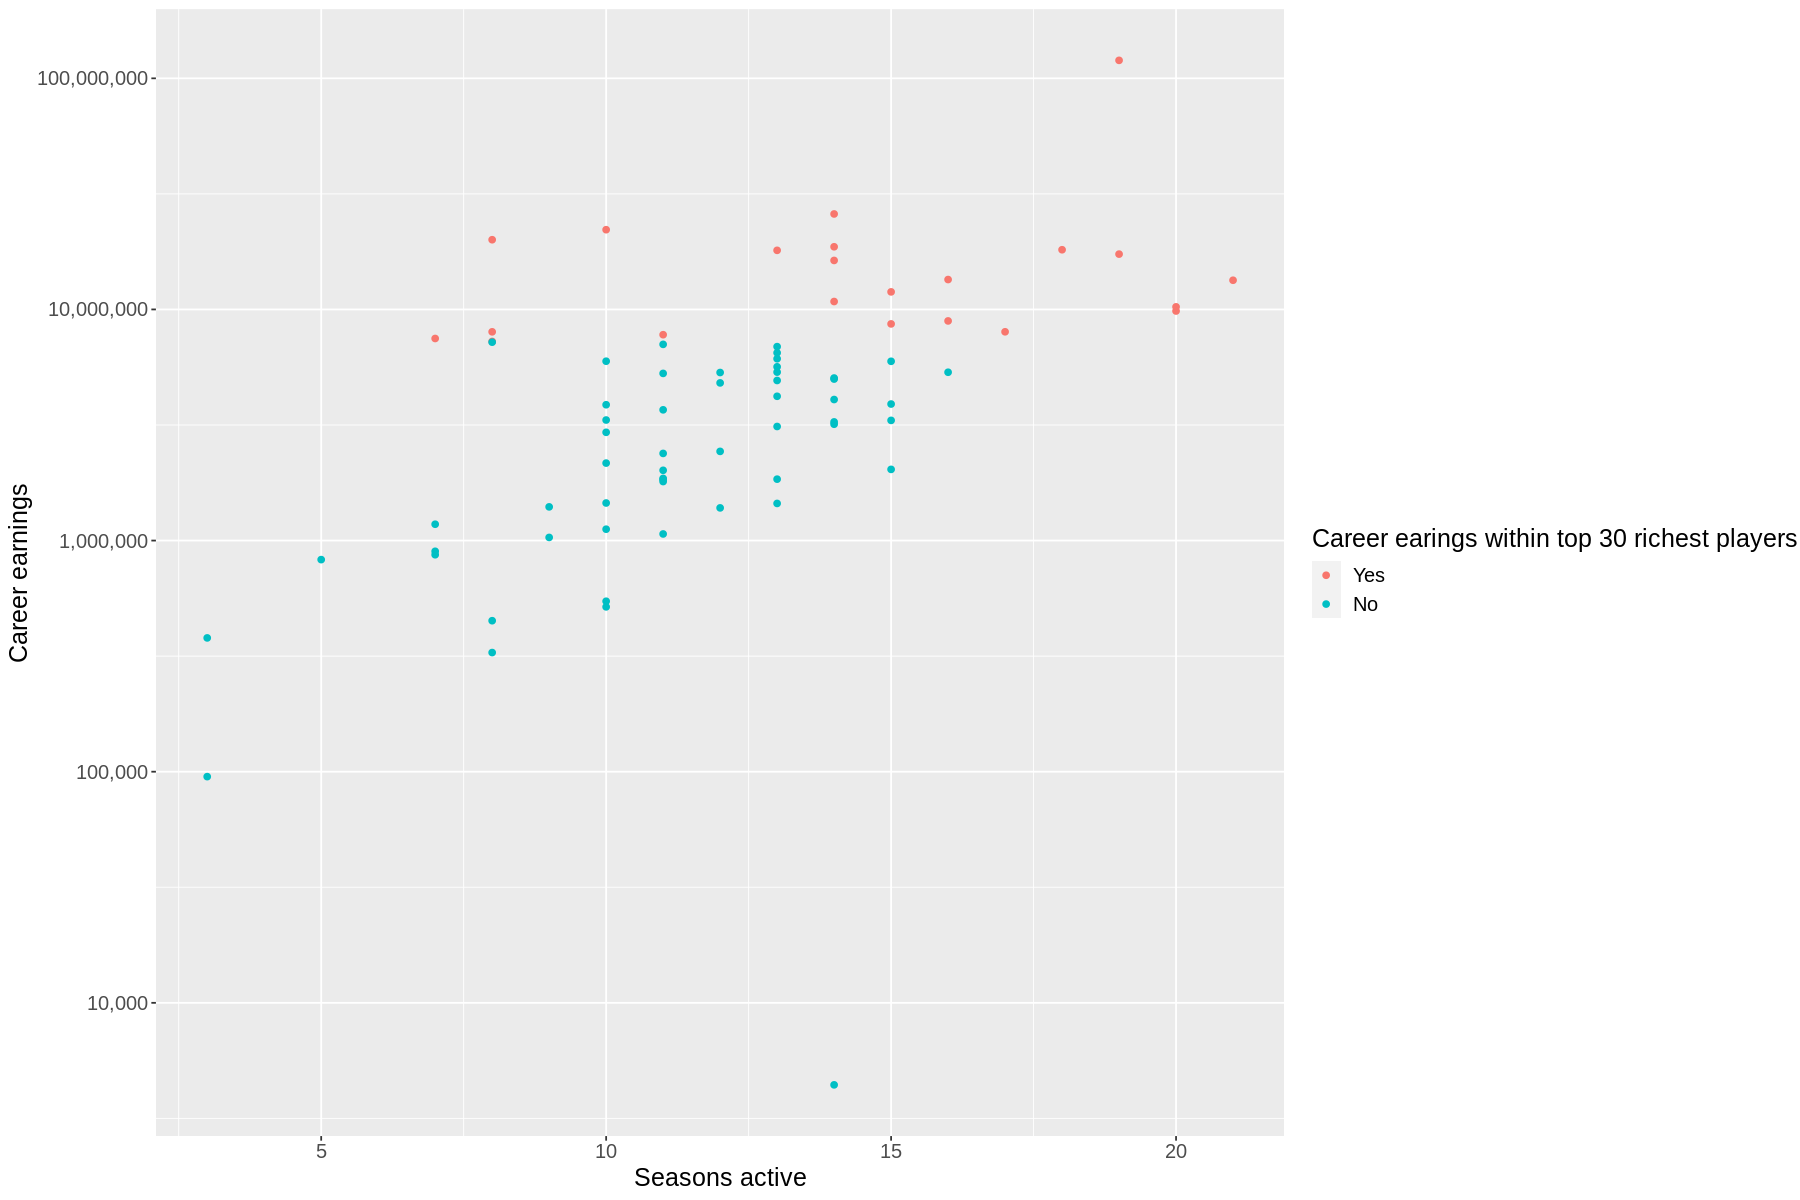

In [9]:
options(repr.plot.height = 10, repr.plot.width = 15)


seasons_v_pm <- ggplot(player_train, aes(x = Seasons_active, y = Career_earnings, color= is_within_thirty))+
      geom_point() +
      labs(x = "Seasons active", y = "Career earnings", color= "Career earings within top 30 richest players") + 
        theme(text= element_text(size=15))+
        scale_y_log10(labels= label_comma())


seasons_v_pm

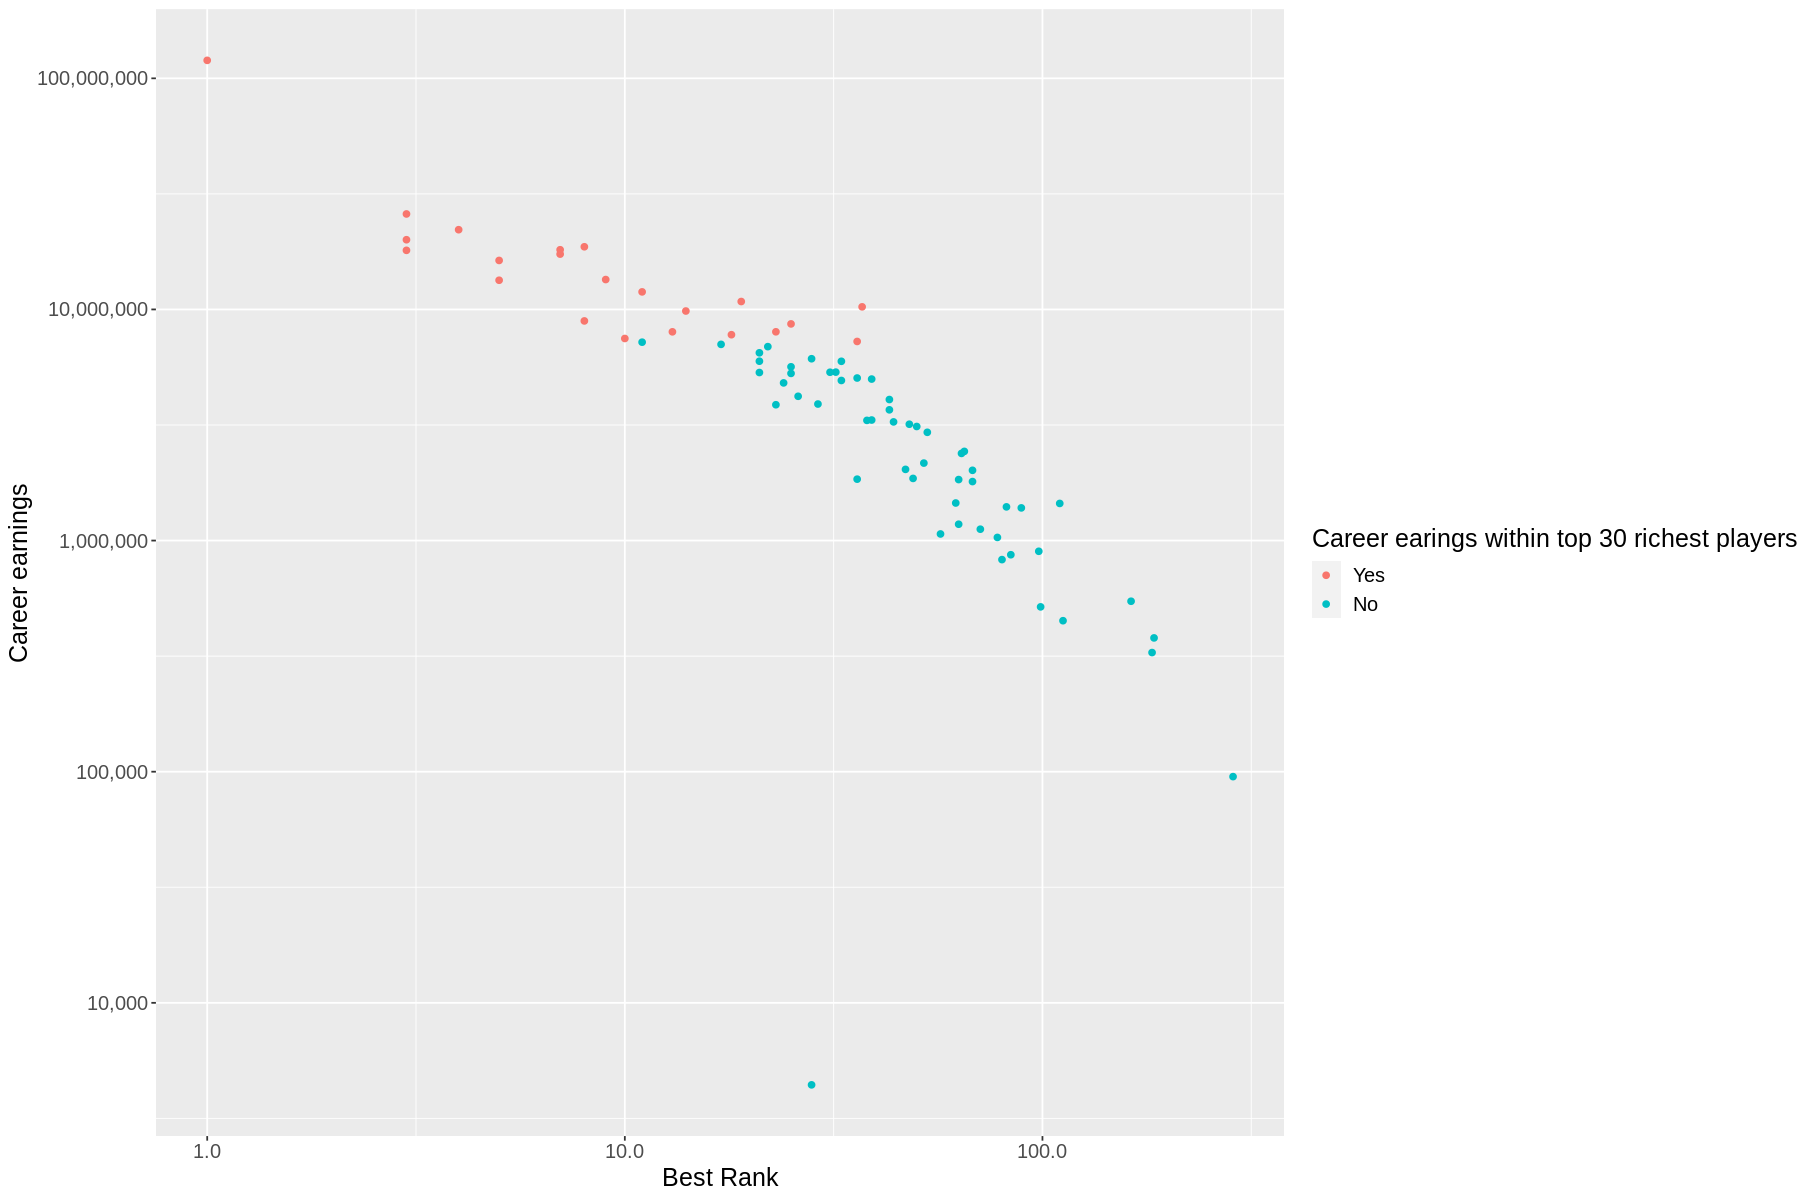

In [10]:
best_rank_vs_pm <- ggplot(player_train, aes(x = Best_Rank, y = Career_earnings, color= is_within_thirty))+
      geom_point() +
      labs(x = "Best Rank", y = "Career earnings", color= "Career earings within top 30 richest players") + 
        theme(text= element_text(size=15))+
        scale_y_log10(labels= label_comma())+
        scale_x_log10(labels= label_comma())

        
best_rank_vs_pm

## Expected outcomes and significance

In theory, players with a longer career should have greater career earnings, although this will vary with many other factors which we examine in this project. Future analyses this could lead to includes finding what other factors predict for greater financial earnings. Future analyses could even build off of our project by constructing a model which predicts for total career earnings by the time they retire. Of course, this cannot be done with our model as there are a plethora of outliers in the tennis world who achieved success at a young age only to diminish from stardom.
